## 🚩 Objective 2:
### Create a Model that Predicts if a person will go bald

**Import the cleaned dataset from the previous notebook:**

In [80]:
import pandas as pd
hair_df = pd.read_csv('datasets/cleaned_hair.csv')
hair_df.drop(['Unnamed: 0'], inplace = True, axis = 1)
df = hair_df.copy()
hair_df.head()

,id,genetics,hormonal_changes,medical_conditions,medications_and_treatments,nutritional_deficiencies,stress,age,poor_hair_care_habits,environmental_factors,smoking,weight_loss,hair_loss
0,133992,1,0,No Data,No Data,Magnesium deficiency,Moderate,19,1,1,0,0,0
1,148393,0,0,Eczema,Antibiotics,Magnesium deficiency,High,43,1,1,0,0,0
2,155074,0,0,Dermatosis,Antifungal Cream,Protein deficiency,Moderate,26,1,1,0,1,0
3,118261,1,1,Ringworm,Antibiotics,Biotin Deficiency,Moderate,46,1,1,0,0,0
4,111915,0,0,Psoriasis,Accutane,Iron deficiency,Moderate,30,0,1,1,0,1


**Preprocess data by encoding categorical data into numerical data:**
- This is important because machine learning models use numbers thus the need for preprocessing

In [81]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

X = hair_df.drop(['hair_loss', 'id'], axis = 1)
y = hair_df['hair_loss']

ordinal_cols = ['stress']
nominal_cols = ['medical_conditions', 'medications_and_treatments', 'nutritional_deficiencies']

preprocessor = ColumnTransformer(transformers=[
    ('ordinal', OrdinalEncoder(categories=[['Low', 'Moderate', 'High']]), ordinal_cols),
    ('nominal', OneHotEncoder(drop='first', sparse_output=False), nominal_cols)
], remainder='passthrough')

# Fit and transform
X_cat_encoded = preprocessor.fit_transform(X)

# Get feature names
column_names = preprocessor.get_feature_names_out()

# Create dataframe
X_cat_encoded_df = pd.DataFrame(X_cat_encoded, columns=column_names)

In [82]:
X_cat_encoded_df.head()

,ordinal__stress,nominal__medical_conditions_Androgenetic Alopecia,nominal__medical_conditions_Dermatitis,nominal__medical_conditions_Dermatosis,nominal__medical_conditions_Eczema,nominal__medical_conditions_No Data,nominal__medical_conditions_Psoriasis,nominal__medical_conditions_Ringworm,nominal__medical_conditions_Scalp Infection,nominal__medical_conditions_Seborrheic Dermatitis,...,nominal__nutritional_deficiencies_Vitamin D Deficiency,nominal__nutritional_deficiencies_Vitamin E deficiency,nominal__nutritional_deficiencies_Zinc Deficiency,remainder__genetics,remainder__hormonal_changes,remainder__age,remainder__poor_hair_care_habits,remainder__environmental_factors,remainder__smoking,remainder__weight_loss
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,19.0,1.0,1.0,0.0,0.0
1,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,43.0,1.0,1.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,26.0,1.0,1.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,46.0,1.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,30.0,0.0,1.0,1.0,0.0


The above table shows the first five rows of a transformed hair dataset (`hair_df`). What happened:
1. The nominal data `['medical_conditions', 'medications_and_treatments', 'nutritional_deficiencies']` have been transformed to have their own columns for each of their value while dropping the last value to avoid redundancy.
2. The ordinal data `['stress']` has also been transformed to represent each of its value with corresponding numerical values

In [83]:
# copy the dataset for future use
ml_hair_df = X_cat_encoded_df.copy()
ml_hair_df['hair_loss'] = y
ml_hair_df.head()

,ordinal__stress,nominal__medical_conditions_Androgenetic Alopecia,nominal__medical_conditions_Dermatitis,nominal__medical_conditions_Dermatosis,nominal__medical_conditions_Eczema,nominal__medical_conditions_No Data,nominal__medical_conditions_Psoriasis,nominal__medical_conditions_Ringworm,nominal__medical_conditions_Scalp Infection,nominal__medical_conditions_Seborrheic Dermatitis,...,nominal__nutritional_deficiencies_Vitamin E deficiency,nominal__nutritional_deficiencies_Zinc Deficiency,remainder__genetics,remainder__hormonal_changes,remainder__age,remainder__poor_hair_care_habits,remainder__environmental_factors,remainder__smoking,remainder__weight_loss,hair_loss
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,19.0,1.0,1.0,0.0,0.0,0
1,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,43.0,1.0,1.0,0.0,0.0,0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,26.0,1.0,1.0,0.0,1.0,0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,46.0,1.0,1.0,0.0,0.0,0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,30.0,0.0,1.0,1.0,0.0,1


**Preprocess data by scaling numerical data:**
- This is important because features on a larger scale can disproportionately influence the model hence the normalization or standardization of the features (numerical)


In [84]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

X = ml_hair_df.drop('hair_loss', axis = 1)
y = ml_hair_df['hair_loss']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scale_cols = ['remainder__age', 'ordinal__stress']
rest_cols = [col for col in X.columns if col not in scale_cols]

preprocessor = ColumnTransformer(transformers=[
    ('scale', StandardScaler(), scale_cols)
], remainder='passthrough')

X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

**The above table shows the first five rows of a scaled hair dataset (hair_df). What happened:**
1. The datasets are splitted into training and testing 
2. The columns `['ordinal__stress', 'remainder__age']` have been scaled which means transforming features to be on the same scale or range. This is done to ensure that no feature dominates another due to differences in their units or magnitude
3. This also makes the use of some machine learning models possible for some of them performs best when data are scaled

**Scale the dataframe for models that need scaling:**
- Models that need scaling include:
  - Logistic Regression
  - KNN

**Keep the dataframe for models that do not need scaling:**
- Models that need scaling include:
  - Decision Tree Classifier
  - Random Forest Classifier

**Evaluate the better model that uses scaled data:**
- This is important so that for future use only one model can be used for prediction or for fine tuning

In [85]:
# Train the dataset
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

models = {"KNN": KNeighborsClassifier(), "Logistic Regression": LogisticRegression()}
results = []

for model in models.values():
    kf = KFold(n_splits = 5, random_state = 42, shuffle = True)
    results.append(cross_val_score(model, X_train_scaled, y_train, cv = kf, scoring = 'accuracy'))

scaled_scores = []
for i in range(2):
    print(f"Accuracy mean from all the folds ({list(models.keys())[i]}): {results[i].mean()}")
    scaled_scores.append(results[i].mean())

scaled_prediction_scores = []
print("\n")
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    test_score = round(model.score(X_test_scaled, y_test), 2)
    print(name + " against testing dataset: " + str(test_score))
    scaled_prediction_scores.append(test_score)

Accuracy mean from all the folds (KNN): 0.5106761006289308
Accuracy mean from all the folds (Logistic Regression): 0.47061320754716973


KNN against testing dataset: 0.51
Logistic Regression against testing dataset: 0.47


In [86]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


models_unscaled = {"DTC": DecisionTreeClassifier(), "Random Forest": RandomForestClassifier()}

for model in models_unscaled.values():
    kf = KFold(n_splits = 5, random_state = 42, shuffle = True)
    results.append(cross_val_score(model, X_train, y_train, cv = kf, scoring = 'accuracy'))

unscaled_scores =[]
for i in range(2, 4):
    print(f"Accuracy mean from all the folds ({list(models_unscaled.keys())[i - 2]}): {results[i].mean()}")
    unscaled_scores.append(results[i].mean())
    
print("\n")

unscaled_prediction_scores = []
for name, model in models_unscaled.items():
    model.fit(X_train, y_train)
    test_score = round(model.score(X_test, y_test), 2)
    unscaled_prediction_scores.append(test_score)
    print(name + " against testing dataset: " + str(test_score))

Accuracy mean from all the folds (DTC): 0.4969654088050315
Accuracy mean from all the folds (Random Forest): 0.5206761006289308


DTC against testing dataset: 0.47
Random Forest against testing dataset: 0.45


In [87]:
scaled_model_name = list(models.keys())
unscaled_model_name = list(models_unscaled.keys())

models_names = pd.Series(scaled_model_name + unscaled_model_name) 
prediction_scores = pd.Series(scaled_prediction_scores + unscaled_prediction_scores)
scores = list(scaled_scores + unscaled_scores)
scores = pd.Series([round(float(score), 2) for score in scores])

print(models_names)
print(scores)
print(prediction_scores)

0                    KNN
1    Logistic Regression
2                    DTC
3          Random Forest
dtype: object
0    0.51
1    0.47
2    0.50
3    0.52
dtype: float64
0    0.51
1    0.47
2    0.47
3    0.45
dtype: float64


In [88]:
df_scores = pd.DataFrame({
    'Model': models_names,
    'Score': scores,
    'Prediction Score': prediction_scores
})

df_scores

,Model,Score,Prediction Score
0,KNN,0.51,0.51
1,Logistic Regression,0.47,0.47
2,DTC,0.50,0.47
3,Random Forest,0.52,0.45


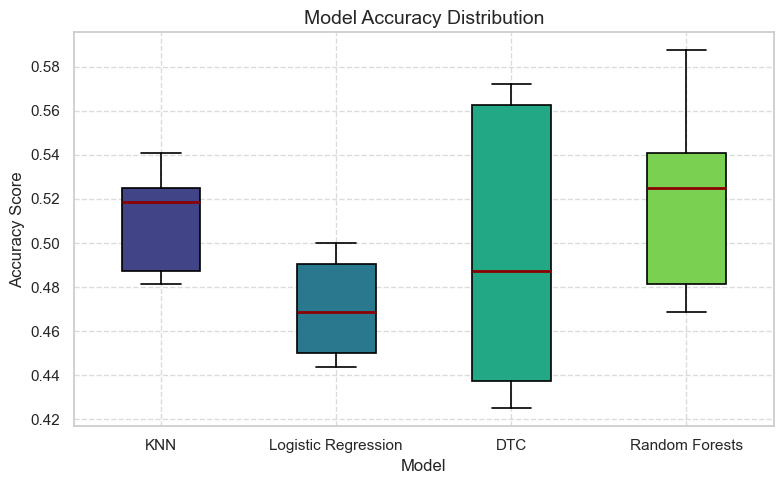

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

# plt.boxplot(results, tick_labels = ['KNN', 'Logistic Regression', 'DTC', 'Random Forests'])
# plt.show()

# Optional: Set global Seaborn style
sns.set(style="whitegrid")

# Define colors using viridis palette
colors = sns.color_palette("viridis", len(results))

# Create the boxplot
fig, ax = plt.subplots(figsize=(8, 5))
box = ax.boxplot(
    results,
    patch_artist=True,  # allows color fill
    tick_labels=['KNN', 'Logistic Regression', 'DTC', 'Random Forests']
)

# Style each box with viridis colors
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_edgecolor('black')
    patch.set_linewidth(1.2)

# Style whiskers, caps, medians
for whisker in box['whiskers']:
    whisker.set_color('black')
    whisker.set_linewidth(1.2)

for cap in box['caps']:
    cap.set_color('black')
    cap.set_linewidth(1.2)

for median in box['medians']:
    median.set_color('darkred')
    median.set_linewidth(2)

# Add title and axis labels
ax.set_title("Model Accuracy Distribution", fontsize=14)
ax.set_ylabel("Accuracy Score", fontsize=12)
ax.set_xlabel("Model", fontsize=12)

# Add grid
ax.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


---

## 🚩 Objective 3
### Get the Feature importance

In [91]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
importances = model.feature_importances_  # array of importance scores

In [92]:
len(importances)

38

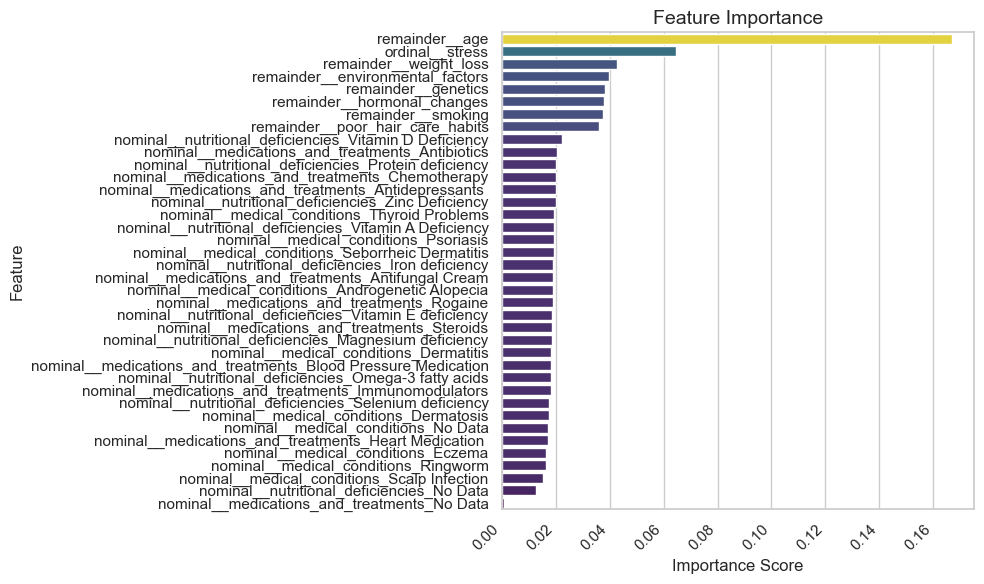

In [95]:
import numpy as np

feature_names = np.array(ml_hair_df.columns)

sorted_indices = np.argsort(importances)[::-1]

sorted_importances = importances[sorted_indices]
sorted_names = feature_names[sorted_indices]

plt.figure(figsize=(10, 6))

sns.barplot(x=sorted_importances, y=sorted_names, palette='viridis', hue = sorted_importances, legend = False)


plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.title("Feature Importance", fontsize=14)

plt.xticks(rotation=45, ha='right') 
plt.tight_layout() 

plt.show()

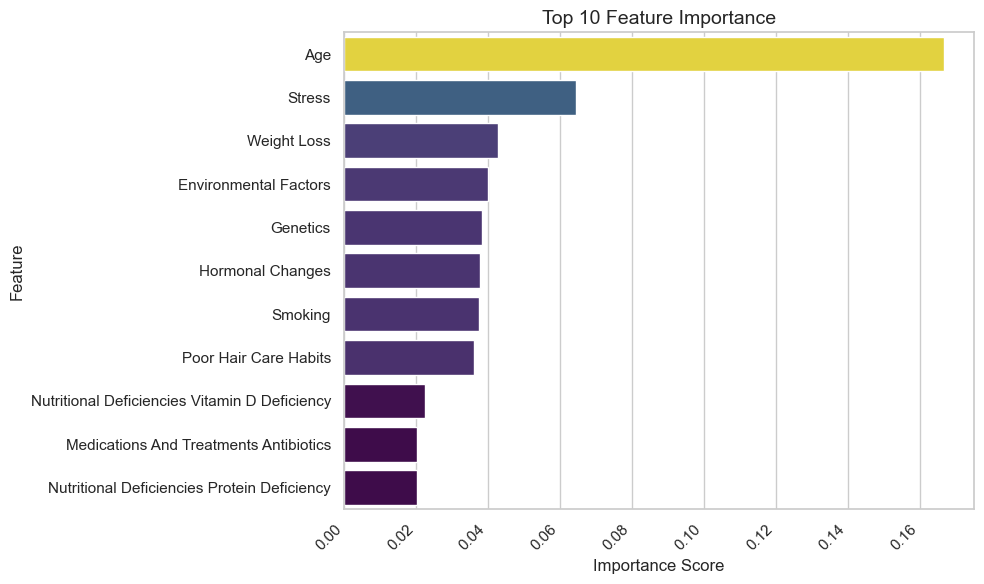

In [101]:
import re
regex = r'\w+__'

plt.figure(figsize=(10, 6))

sorted_importances_10 = sorted_importances[:11]
sorted_names_10 = sorted_names[:11]

sorted_names_10 = [re.sub(regex, '', label).replace('_', ' ').title() for label in sorted_names_10]

sns.barplot(x=sorted_importances_10, y=sorted_names_10, palette='viridis', hue = sorted_importances_10, legend = False)

plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.title("Top 10 Feature Importance", fontsize=14)

plt.xticks(rotation=45, ha='right') 
plt.tight_layout() 

plt.show()

---

## 